In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import os
#os.path.exists('/content/src/')
os.chdir('/content/drive/My Drive/')
currentDirectory = os.getcwd()
print(currentDirectory)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
import numpy as np
import csv
from keras.utils import to_categorical
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import pandas as pd


df_train = pd.read_csv('/content/drive/My Drive/data/mitbih_train.csv', header=None)
#df_train = numpy.genfromtxt('/content/drive/My Drive/data/mitbih_train.csv',delimiter= " ",dtype=numpy.float);
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv('/content/drive/My Drive/data/mitbih_test.csv', header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

model1_load = keras.models.load_model('/content/drive/My Drive/saved_models/PhD_Model3_FICC')
#new_model3.summary()

y_pred = model1_load.predict(X)
y_pred_classes_train = np.argmax(y_pred, axis=-1)
C = np.matrix([np.asarray(Y), np.asarray(y_pred_classes_train)])
np.savetxt('model_FICC_train_Predict.txt', C, delimiter=',', fmt='%f')

y_pred = model1_load.predict(X_test)
y_pred_classes_test = np.argmax(y_pred, axis=-1)
C = np.matrix([np.asarray(Y_test), np.asarray(y_pred_classes_test)])
np.savetxt('model_FICC_test_Predict.txt', C, delimiter=',', fmt='%f')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
import pandas as pd
import numpy as np
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,Conv1D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, ELU, GlobalMaxPool1D, LeakyReLU, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score




batch_size = 64
epochs = 100
df_train = pd.read_csv('/content/drive/My Drive/data/mitbih_train.csv', header=None)
#df_train = numpy.genfromtxt('/content/drive/My Drive/data/mitbih_train.csv',delimiter= " ",dtype=numpy.float);
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv('/content/drive/My Drive/data/mitbih_test.csv', header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]


def get_model2():
  #tf.enable_eager_execution()
  nclass = 5
  inp = Input(shape=(187, 1))
  img_1 = Convolution1D(32, kernel_size=3, activation=activations.linear, padding="same")(inp)
  img_1 = LeakyReLU(alpha=0.1)(img_1)
  img_1 = MaxPool1D(pool_size=2)(img_1)
  img_1 = Convolution1D(64, kernel_size=3, activation=activations.linear, padding="same")(img_1)
  img_1 = LeakyReLU(alpha=0.1)(img_1)
  img_1 = MaxPool1D(pool_size=2)(img_1)
  img_1 = Convolution1D(128, kernel_size=3, activation=activations.linear, padding="same")(img_1)
  img_1 = LeakyReLU(alpha=0.1)(img_1)
  img_1 = MaxPool1D(pool_size=2)(img_1)
  img_1 = Flatten()(img_1)
  dense_1 = Dense(128, activation=activations.linear, name="dense_1")(img_1)
  img_1 = LeakyReLU(alpha=0.1)(dense_1)
  dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_mitbih")(img_1)
  model = models.Model(inputs=inp, outputs=dense_1)
  opt = optimizers.Adam(0.001)
  model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
  model.summary()
  return model
  

model3 = get_model2()
file_path2 = "baseline_cnn_mitbih2.h5"
checkpoint2 = ModelCheckpoint(file_path2, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early2 = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat2 = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list2 = [checkpoint2, early2, redonplat2]  # early

model3.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list2, validation_split=0.1)
model3.load_weights(file_path2)
test_predict = model3.predict(X_test)
test_predict_label = np.argmax(test_predict, axis=-1)
test_true = np.argmax(Y_test, axis=-1)

X_train = model3.predict(X)
train_pred_classes = np.argmax(X_train, axis=-1)
train_true = np.argmax(Y, axis=-1)







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 32)           128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 187, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 93, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 93, 64)            6208      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 93, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 46, 64)          

In [ ]:
model3.load_weights(file_path2)
test_predict = model3.predict(X_test)
test_predict_label = np.argmax(test_predict, axis=-1)
test_true = np.argmax(Y_test, axis=-1)

X_train = model3.predict(X)
train_pred_classes = np.argmax(X_train, axis=-1)
train_true = np.argmax(Y, axis=-1)

test_eval =  accuracy_score(Y_test, test_predict_label)
train_eval =  accuracy_score(Y, train_pred_classes)

print('Test accuracy:', test_eval)

print('train accuracy:', train_eval)

Test accuracy: 0.9067239174127535
train accuracy: 0.913813189574434


In [ ]:
model3.save('/content/drive/My Drive/saved_models/PhD_Model3_FICC')

In [ ]:
f1 = f1_score(Y_test, test_predict_label, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, test_predict_label)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.4957302044324462 
Test accuracy score : 0.9067239174127535 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[7234600    8700    3800       0       0]
 [  23200  198500     600       0       0]
 [   9700    1400  567700       0       0]
 [  45100     100   18900       0       0]
 [ 279000   25200  338900       0       0]]
[7234600  198500  567700       0       0]


<Figure size 432x288 with 0 Axes>

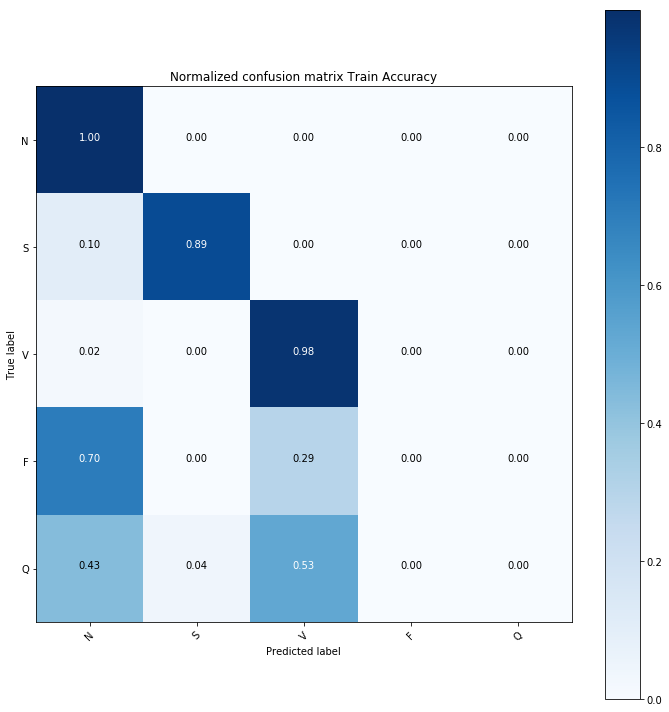

[[1804300    5200    2300       0       0]
 [  12500   42400     700       0       0]
 [   5700     800  138300       0       0]
 [  10700       0    5500       0       0]
 [  70900    6000   83900       0       0]]
[1804300   42400  138300       0       0]


<Figure size 432x288 with 0 Axes>

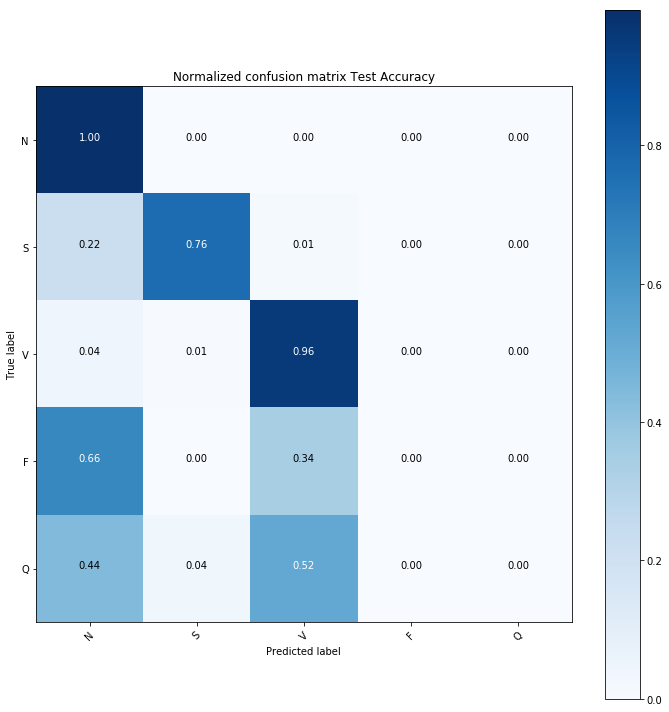

In [ ]:
import numpy as np
import csv
from keras.utils import to_categorical
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import pandas as pd



def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_Model3_FICC_'+str(rrr)+'.jpg')



confusion_mat = confusion_matrix(Y, train_pred_classes)
# plot the confusion matrix
# plot normalized confusion matrix
conf = confusion_mat  *100
#numpy.savetxt('/content/drive/My Drive/app/Models/Train_model_3.csv',conf,delimiter=',')
#conf.to_csv('Train_model_3.csv')
print(conf)
diagonal = np.diag(conf)
print(diagonal)
rrr = 1
plt.figure()
plot_confusion_matrix(confusion_mat, classes=['N', 'S', 'V', 'F','Q'], title='Normalized confusion matrix Train Accuracy')
plt.show()


confusion_mat_test = confusion_matrix(Y_test, test_predict_label)
# plot the confusion matrix
# plot normalized confusion matrix
conf_test = confusion_mat_test  *100
#numpy.savetxt('/content/drive/My Drive/app/Models/Train_model_3.csv',conf,delimiter=',')
#conf.to_csv('Train_model_3.csv')
print(conf_test)
diagonal_test = np.diag(conf_test)
print(diagonal_test)
rrr = 2
plt.figure()
plot_confusion_matrix(confusion_mat_test, classes=['N', 'S', 'V', 'F','Q'], title='Normalized confusion matrix Test Accuracy')
plt.show()


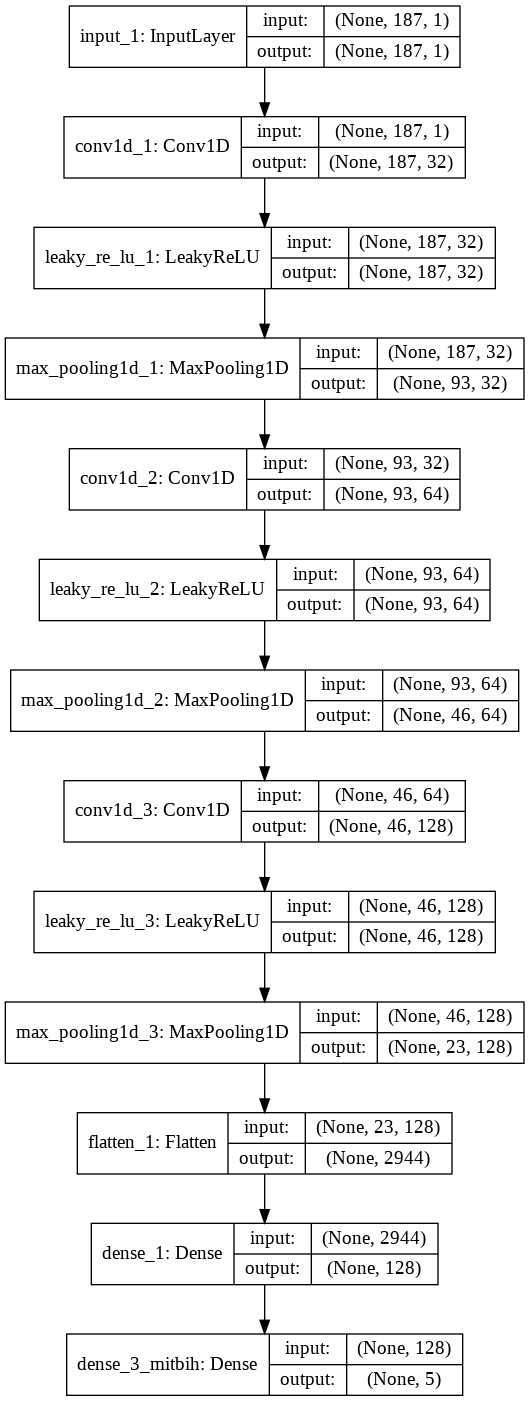

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model_plot_FICC.png', show_shapes=True, show_layer_names=True)